# Problem
**Problem statement**: For this toy problem, we have a dataset of transactions occurred in a range of time using credit card. Our goal is to detect any fradulant transaction by using this dataset so that in future this does not take place. Another name for this task is Anomaly Detection.<br>

**Our dataset**:<br>
- Have feature columns V1,V2...v28 some attribute .<br>
- Time of transaction (Time column)<br>
- Transited amount (Amount column)<br>
- Class Feature this is the response variable and it takes value 1 in case of fraud and 0 otherwise.<br>

**Library used in this code sample**:<br>
- *numpy* and *pandas*: preprocessing, loading the dataset
- *matplotlib* and *seaborn*: plotting and visualizing
- *imblearn*: implementation of SMOTE
- *sklearn*: implementation of a variety of classification models, *e.g.*: Logistic Regression, Decision Tree.

**Source**: [Credit Card Fraud Detection with SMOTE handling](https://www.kaggle.com/himanshuyadav95627/credit-card-fraud-detection-with-smote-handling/notebook)

## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


## Load the Dataset into pandas Dataframe

In [2]:
df = pd.read_csv("./creditcard.csv")
print(df.shape)
print()
df.head()

(284807, 31)



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#check if there is any missing values in our dataset
print(df.isna().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [4]:
#check ,all the data formats are correct 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Exploratory Data Analysis

0    284315
1       492
Name: Class, dtype: int64

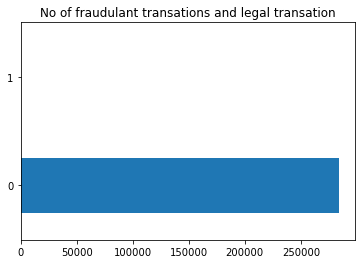

In [6]:
df['Class'].value_counts().plot.barh()
plt.title("No of fraudulant transations and legal transation")
df['Class'].value_counts()

We see that the number of fraudulant transactions are very little (`492`) compared to the number of non-fraud transactions.<br>

This is an **imbalanced dataset**.

## Apply and Measure the model's performance *before* SMOTE

(284807, 30) (284807,)


<AxesSubplot:>

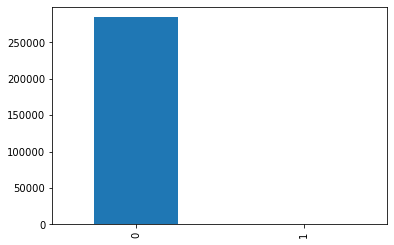

In [7]:
x = df.drop("Class",axis=1) #x will contain all columns of data except `class`
y = df['Class']
print(x.shape,y.shape)
#before smote 
y.value_counts().plot.bar()

In [8]:
#split data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=.25)

### Logistic Regression

In [9]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

acc_lr = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
print(f"Accuracy Score of Logistic Regression : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression : 0.9987640796606837
Confusion Matrix : 
[[71047    42]
 [   46    67]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.61      0.59      0.60       113

    accuracy                           1.00     71202
   macro avg       0.81      0.80      0.80     71202
weighted avg       1.00      1.00      1.00     71202



### Logistic Regression with cross validation

In [10]:
clf = LogisticRegressionCV(cv = 5)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

acc_lr = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
print(f"Accuracy Score of Logistic Regression : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression : 0.9990871042948232
Confusion Matrix : 
[[71076    13]
 [   52    61]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.82      0.54      0.65       113

    accuracy                           1.00     71202
   macro avg       0.91      0.77      0.83     71202
weighted avg       1.00      1.00      1.00     71202



### Decision Tree

In [11]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

acc_dtc = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.9991573270413753
Confusion Matrix : 
[[71056    33]
 [   27    86]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.72      0.76      0.74       113

    accuracy                           1.00     71202
   macro avg       0.86      0.88      0.87     71202
weighted avg       1.00      1.00      1.00     71202



### Random Forest

In [12]:
random_clf = RandomForestClassifier()
random_clf.fit(x_train, y_train)

y_pred_random_clf = random_clf.predict(x_test)

acc_rd_clf = accuracy_score(y_test, y_pred_random_clf)
conf = confusion_matrix(y_test, y_pred_random_clf)
clf_report = classification_report(y_test, y_pred_random_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.9996067526193084
Confusion Matrix : 
[[71082     7]
 [   21    92]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.93      0.81      0.87       113

    accuracy                           1.00     71202
   macro avg       0.96      0.91      0.93     71202
weighted avg       1.00      1.00      1.00     71202



## Overall evaluation: 
Although the accuracy score is high (> 99% for all models), however, the recall score for the minority class (fraud), is considerable low, which mean that the model is likely to let the fraud transaction pass through as a non-fraud one.

This is the **opposite** of what we want, which is for the model to detect all possible fraud transactions. It is also okay if the model detects some of the non-fraud transactions as a fraud one. The important thing is not to let any fraud transactions pass through our classifications.

Now, let try to apply SMOTE on the dataset, before training the model to see if the **recall** score of the minority class can be improve or not.

## Implement Synthetic Minority Over-Sampling Technique (SMOTE)

In [13]:
x = df.drop("Class",axis=1) #x will contain all columns of data except `class`
y = df['Class']
print(x.shape,y.shape)

(284807, 30) (284807,)


<AxesSubplot:>

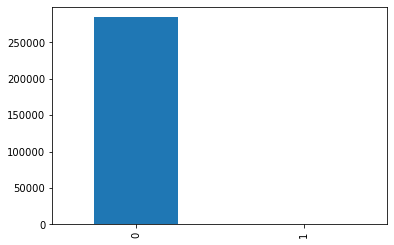

In [14]:
#before smote 
y.value_counts().plot.bar()

In [15]:
#split data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=.25)

AFTER SMOTE


<AxesSubplot:>

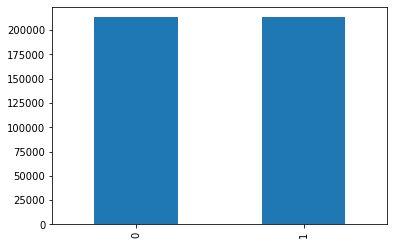

In [16]:
# implement smote now
smote = SMOTE(random_state=42)
X,Y  = smote.fit_resample(x_train, y_train)

print("AFTER SMOTE")
Y.value_counts().plot.bar()

In [17]:
X.shape,Y.shape

((426452, 30), (426452,))

As we can see that our dataset is balanced now we added SMOTE.
Now let's proceed further and start building models.

## Apply and Measure the model's performance *after* SMOTE

### Logistic Regression

In [18]:
clf = LogisticRegression()
clf.fit(X,Y)
y_pred = clf.predict(x_test)

acc_lr = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
print(f"Accuracy Score of Logistic Regression : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression : 0.9806185219516306
Confusion Matrix : 
[[69720  1369]
 [   11   102]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71089
           1       0.07      0.90      0.13       113

    accuracy                           0.98     71202
   macro avg       0.53      0.94      0.56     71202
weighted avg       1.00      0.98      0.99     71202



### Logistic regression with cross validation


In [19]:
clf = LogisticRegressionCV(cv = 5)
clf.fit(X,Y)
y_pred = clf.predict(x_test)

acc_lr = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
print(f"Accuracy Score of Logistic Regression : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression : 0.9862082525771748
Confusion Matrix : 
[[70117   972]
 [   10   103]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     71089
           1       0.10      0.91      0.17       113

    accuracy                           0.99     71202
   macro avg       0.55      0.95      0.58     71202
weighted avg       1.00      0.99      0.99     71202



### Decision Tree

In [20]:
clf = DecisionTreeClassifier()
clf.fit(X, Y)
y_pred = clf.predict(x_test)

acc_dtc = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")


Accuracy Score of Decision Tree is : 0.9975983820679194
Confusion Matrix : 
[[70943   146]
 [   25    88]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.38      0.78      0.51       113

    accuracy                           1.00     71202
   macro avg       0.69      0.89      0.75     71202
weighted avg       1.00      1.00      1.00     71202



### Random Forest

In [21]:
random_clf = RandomForestClassifier()
random_clf.fit(X, Y)

y_pred_random_clf = random_clf.predict(x_test)

acc_rd_clf = accuracy_score(y_test, y_pred_random_clf)
conf = confusion_matrix(y_test, y_pred_random_clf)
clf_report = classification_report(y_test, y_pred_random_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.9994663071262043
Confusion Matrix : 
[[71068    21]
 [   17    96]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.82      0.85      0.83       113

    accuracy                           1.00     71202
   macro avg       0.91      0.92      0.92     71202
weighted avg       1.00      1.00      1.00     71202



Indeed, the recall score of the minority class for the corresponded model is **increased**.